# 1.3  Data Loading, Storage, and File Formats
* 1.3.1  Reading and Writing Data in Text Format
* 1.3.2  Binary Data Formats

In [1]:
import numpy as np
import pandas as pd
np.random.seed(12345)

In [2]:
# print(np.__version__)
# print(pd.__version__)
# import matplotlib
# print(matplotlib.__version__)
import matplotlib.pyplot as plt

## 1.3.1 Reading and Writing Data in Text Format

`pandas` functions for reading tabular data as a DataFrame object.

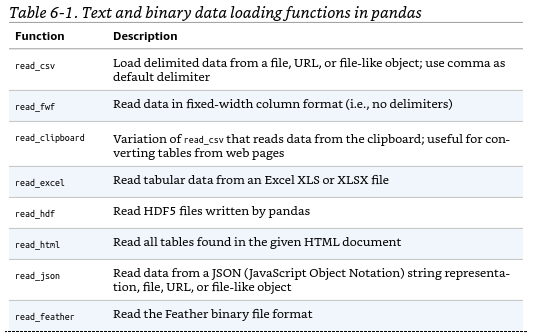

In [3]:
from IPython import display
display.Image("../Images/Module_1.3/table_6-1_p1.png", width = 500)

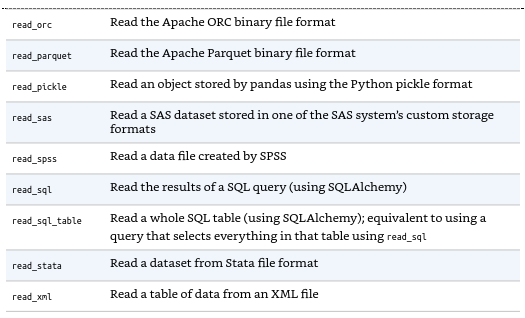

In [4]:
# from IPython import display
display.Image("../Images/Module_1.3/table_6-1_p2.png", width = 500)

In [5]:
# we use !type since our operating system is windows 11
# in linux use !cat ../examples/ex1.csv
!type ..\examples\ex1.csv

a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [6]:
df = pd.read_csv("../examples/ex1.csv")
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


> A file will not always have a header row.

In [7]:
!type ..\examples\ex2.csv

1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [8]:
pd.read_csv("../examples/ex2.csv", header=None)

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [9]:
# supply the names of the columns
pd.read_csv("../examples/ex2.csv", names=["a", "b", "c", "d", "message"])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [10]:
### The message column as the index of the returned DataFrame.
names = ["a", "b", "c", "d", "message"]
pd.read_csv("../examples/ex2.csv", names=names, index_col="message")

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


### Hierarchical indexing

In [11]:
# with linux: !cat examples/csv_mindex.csv
!type ..\examples\csv_mindex.csv

key1,key2,value1,value2
one,a,1,2
one,b,3,4
one,c,5,6
one,d,7,8
two,a,9,10
two,b,11,12
two,c,13,14
two,d,15,16


In [12]:
pd.read_csv("../examples/csv_mindex.csv")

,key1,key2,value1,value2
0,one,a,1,2
1,one,b,3,4
2,one,c,5,6
3,one,d,7,8
4,two,a,9,10
5,two,b,11,12
6,two,c,13,14
7,two,d,15,16


In [13]:
parsed = pd.read_csv("../examples/csv_mindex.csv",
                     index_col=["key1", "key2"])
parsed

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

#### A table might not have a fixed delimiter. Instead it uses whitespace or some other pattern to separate fields.

In [14]:
# In Linux: !cat ../examples/ex3.txt
!type ..\examples\ex3.txt

            A         B         C
aaa -0.264438 -1.026059 -0.619500
bbb  0.927272  0.302904 -0.032399
ccc -0.264273 -0.386314 -0.217601
ddd -0.871858 -0.348382  1.100491


In [15]:
#  Regex "\s+" means one or many whitespaces. 
result01 = pd.read_csv("../examples/ex3.txt", sep="\s+")
result01

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


In [16]:
print(type(result01))
print(result01.shape)

<class 'pandas.core.frame.DataFrame'>
(4, 3)


### Skipping a row or rows of a file

In [17]:
#!cat ../examples/ex4.csv
!type ..\examples\ex4.csv

# hey!
a,b,c,d,message
# just wanted to make things more difficult for you
# who reads CSV files with computers, anyway?
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [18]:
# skipping the first, 3rd and 4th rows of ex4.csv
pd.read_csv("../examples/ex4.csv", skiprows=[0, 2, 3])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


#### Handling missing values

In [19]:
# !cat ../examples/ex5.csv
!type ..\examples\ex5.csv

something,a,b,c,d,message
one,1,2,3,4,NA
two,5,6,,8,world
three,9,10,11,12,foo


In [20]:
result02 = pd.read_csv("../examples/ex5.csv")
result02

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


#####  `pandas` outputs missing values as `NaN`.

In [21]:
# two missing values
pd.isna(result02)

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


##### pandas.read_csv has a list of many default `NA` value representations, but these defaults can be disabled with the `keep_default_na` option:

In [22]:
result03 = pd.read_csv("../examples/ex5.csv", keep_default_na=False)
result03

,something,a,b,c,d,message
0,one,1,2,3,4,NA
1,two,5,6,,8,world
2,three,9,10,11,12,foo


In [23]:
result03.isna()

,something,a,b,c,d,message
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False


In [24]:
result04 = pd.read_csv("../examples/ex5.csv", keep_default_na=False,
                      na_values=["NA"])
result04

,something,a,b,c,d,message
0,one,1,2,3,4,NaN
1,two,5,6,,8,world
2,three,9,10,11,12,foo


In [25]:
result04.isna()

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,False,False,False
2,False,False,False,False,False,False


##### Different `NA` sentinels can be specified for each column in a dictionary

In [26]:
# In linux use !cat ../examples/ex5.csv
!type ..\examples\ex5.csv

something,a,b,c,d,message
one,1,2,3,4,NA
two,5,6,,8,world
three,9,10,11,12,foo


In [27]:
sentinels = {"message": ["NA", "foo"], "something": ["two"]}
pd.read_csv("../examples/ex5.csv", na_values=sentinels,
            keep_default_na=False)

,something,a,b,c,d,message
0,one,1,2,3,4,NaN
1,NaN,5,6,,8,world
2,three,9,10,11,12,NaN


In [28]:
result05 = pd.read_csv("../examples/ex6.csv")
print(result05)

           one       two     three      four key
0     0.467976 -0.038649 -0.295344 -1.824726   L
1    -0.358893  1.404453  0.704965 -0.200638   B
2    -0.501840  0.659254 -0.421691 -0.057688   G
3     0.204886  1.074134  1.388361 -0.982404   R
4     0.354628 -0.133116  0.283763 -0.837063   Q
...        ...       ...       ...       ...  ..
9995  2.311896 -0.417070 -1.409599 -0.515821   L
9996 -0.479893 -0.650419  0.745152 -0.646038   E
9997  0.523331  0.787112  0.486066  1.093156   K
9998 -0.362559  0.598894 -1.843201  0.887292   G
9999 -0.096376 -1.012999 -0.657431 -0.573315   0

[10000 rows x 5 columns]


In [29]:
result05.head(12)

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q
5,1.817480,0.742273,0.419395,-2.251035,Q
6,-0.776764,0.935518,-0.332872,-1.875641,U
7,-0.913135,1.530624,-0.572657,0.477252,K
8,0.358480,-0.497572,-0.367016,0.507702,S
9,-1.740877,-1.160417,-1.637830,2.172201,G


In [30]:
result05.tail(6)

,one,two,three,four,key
9994,0.068804,1.322759,0.802346,0.223618,H
9995,2.311896,-0.417070,-1.409599,-0.515821,L
9996,-0.479893,-0.650419,0.745152,-0.646038,E
9997,0.523331,0.787112,0.486066,1.093156,K
9998,-0.362559,0.598894,-1.843201,0.887292,G
9999,-0.096376,-1.012999,-0.657431,-0.573315,0


In [31]:
len(result05['key'].unique())

36

In [32]:
# sorting numpy array. Default is ascending order
np.sort(result05['key'].unique())

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C',
       'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P',
       'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'], dtype=object)

In [33]:
# sorting numpy array in descending order
np.sort(result05['key'].unique())[::-1]

array(['Z', 'Y', 'X', 'W', 'V', 'U', 'T', 'S', 'R', 'Q', 'P', 'O', 'N',
       'M', 'L', 'K', 'J', 'I', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A',
       '9', '8', '7', '6', '5', '4', '3', '2', '1', '0'], dtype=object)

In [34]:
# default: ascending = True
result05['key'].value_counts().sort_index(ascending=False)

key
Z    288
Y    314
X    364
W    305
V    328
U    326
T    304
S    308
R    318
Q    340
P    324
O    343
N    306
M    338
L    346
K    334
J    337
I    327
H    330
G    308
F    335
E    368
D    320
C    286
B    302
A    320
9    150
8    162
7    164
6    166
5    157
4    171
3    162
2    152
1    146
0    151
Name: count, dtype: int64

In [35]:
result05['key'].value_counts(ascending = True)

key
1    146
9    150
0    151
2    152
5    157
3    162
8    162
7    164
6    166
4    171
C    286
Z    288
B    302
T    304
W    305
N    306
S    308
G    308
Y    314
R    318
D    320
A    320
P    324
U    326
I    327
V    328
H    330
K    334
F    335
J    337
M    338
Q    340
O    343
L    346
X    364
E    368
Name: count, dtype: int64

#### Reading Text Files in Pieces
To read a file in pieces, specify the number of rows to read from beginning of file (not counting the header).

In [36]:
result06 = pd.read_csv("../examples/ex6.csv", nrows=12)
result06

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q
5,1.817480,0.742273,0.419395,-2.251035,Q
6,-0.776764,0.935518,-0.332872,-1.875641,U
7,-0.913135,1.530624,-0.572657,0.477252,K
8,0.358480,-0.497572,-0.367016,0.507702,S
9,-1.740877,-1.160417,-1.637830,2.172201,G


In [37]:
result06.describe()

,one,two,three,four
count,12.000000,12.000000,12.000000,12.000000
mean,-0.006957,0.446144,-0.018193,-0.191999
std,0.919880,0.853908,0.862072,1.406882
min,-1.740877,-1.160417,-1.637830,-2.251035
25%,-0.570571,-0.181899,-0.459432,-1.192985
50%,0.222725,0.700763,-0.314108,-0.129163
75%,0.385854,1.096970,0.490787,0.648975
max,1.817480,1.530624,1.388361,2.172201


In [38]:
result06.shape

(12, 5)

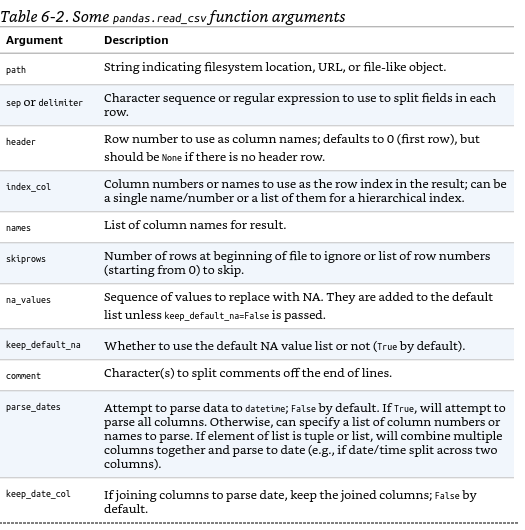

In [39]:
# from IPython import display
display.Image("../Images/Module_1.3/table_6-2_p1.PNG")

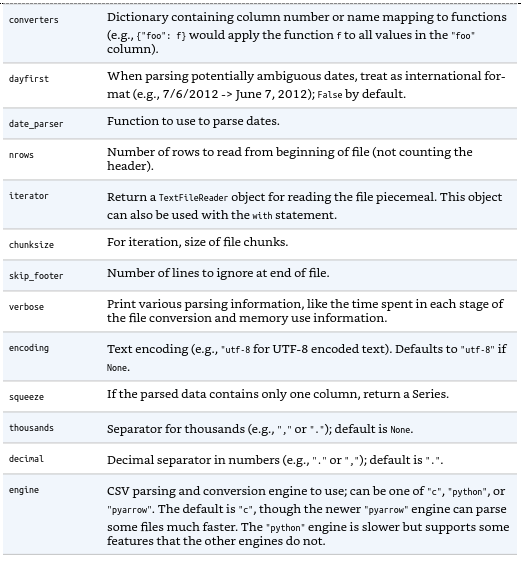

In [40]:
display.Image("../Images/Module_1.3/table_6-2_p2.PNG")

### Writing Data to Text Formats

In [41]:
data = pd.read_csv("../examples/ex5.csv")
data

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [42]:
data.shape

(3, 6)

In [43]:
import sys
print(sys.version)

3.9.17 | packaged by conda-forge | (main, Aug 10 2023, 06:55:58) [MSC v.1929 64 bit (AMD64)]


In [44]:
# Using DataFrame’s to_csv method
# import sys
data.to_csv("../examples/out.csv")
!type ..\examples\out.csv

,something,a,b,c,d,message
0,one,1,2,3.0,4,
1,two,5,6,,8,world
2,three,9,10,11.0,12,foo


In [45]:
# import sys
data.to_csv(sys.stdout, sep="|")

|something|a|b|c|d|message
0|one|1|2|3.0|4|
1|two|5|6||8|world
2|three|9|10|11.0|12|foo


In [46]:
# store to file out2.csv
data.to_csv("../examples/out2.csv", sep="|")
!type ..\examples\out2.csv

|something|a|b|c|d|message
0|one|1|2|3.0|4|
1|two|5|6||8|world
2|three|9|10|11.0|12|foo


In [47]:
data.to_csv(sys.stdout, na_rep="NULL")

,something,a,b,c,d,message
0,one,1,2,3.0,4,NULL
1,two,5,6,NULL,8,world
2,three,9,10,11.0,12,foo


In [48]:
# store to out3.csv
data.to_csv("../examples/out3.csv", na_rep="NULL")
!type ..\examples\out3.csv

,something,a,b,c,d,message
0,one,1,2,3.0,4,NULL
1,two,5,6,NULL,8,world
2,three,9,10,11.0,12,foo


In [51]:
data.to_csv(sys.stdout, index=False, header=False)

one,1,2,3.0,4,
two,5,6,,8,world
three,9,10,11.0,12,foo


In [52]:
data.to_csv(sys.stdout, index=False, columns=["a", "b", "c"])

a,b,c
1,2,3.0
5,6,
9,10,11.0


### JSON Data 

* `JSON` (short for *JavaScript Object Notation*) has become one of the standard formats for sending data by `HTTP` request between web browsers and other applications. 

* It is a much more free-form data format than a tabular text form like `CSV`. 

#### Converting JSON to a valid Python code

* `JSON` is very nearly valid Python code with the exception of its null value `null` and some other nuances such as disallowing trailing commas at the end of lists. 

*  The basic types are objects (*dictionaries*), arrays (*lists*), *strings*, *numbers*, *Booleans*, and *nulls*. 

*  All of the keys in an object must be strings. 

*  There are several Python libraries for reading and writing `JSON` data.

   *  To convert a `JSON` string to Python form, we can use `json.loads`.

In [53]:
obj = """
{"name": "Wes",
 "cities_lived": ["Akron", "Nashville", "New York", "San Francisco"],
 "pet": null,
 "siblings": [{"name": "Scott", "age": 34, "hobbies": ["guitars", "soccer"]},
              {"name": "Katie", "age": 42, "hobbies": ["diving", "art"]}]
}
"""

In [54]:
type(obj)

str

In [55]:
obj

'\n{"name": "Wes",\n "cities_lived": ["Akron", "Nashville", "New York", "San Francisco"],\n "pet": null,\n "siblings": [{"name": "Scott", "age": 34, "hobbies": ["guitars", "soccer"]},\n              {"name": "Katie", "age": 42, "hobbies": ["diving", "art"]}]\n}\n'

In [56]:
print(obj)


{"name": "Wes",
 "cities_lived": ["Akron", "Nashville", "New York", "San Francisco"],
 "pet": null,
 "siblings": [{"name": "Scott", "age": 34, "hobbies": ["guitars", "soccer"]},
              {"name": "Katie", "age": 42, "hobbies": ["diving", "art"]}]
}



In [57]:
import json
result07 = json.loads(obj)
result07

{'name': 'Wes',
 'cities_lived': ['Akron', 'Nashville', 'New York', 'San Francisco'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 34, 'hobbies': ['guitars', 'soccer']},
  {'name': 'Katie', 'age': 42, 'hobbies': ['diving', 'art']}]}

In [58]:
type(result07)

dict

#### Converting from a Python object to JSON (string)
> We can use `json.dumps` to convert a Python object back to `JSON`

In [61]:
asjson = json.dumps(result07)
asjson

'{"name": "Wes", "cities_lived": ["Akron", "Nashville", "New York", "San Francisco"], "pet": null, "siblings": [{"name": "Scott", "age": 34, "hobbies": ["guitars", "soccer"]}, {"name": "Katie", "age": 42, "hobbies": ["diving", "art"]}]}'

In [62]:
type(asjson)

str

#### converting from list to a DataFrame

In [63]:
result07["siblings"]

[{'name': 'Scott', 'age': 34, 'hobbies': ['guitars', 'soccer']},
 {'name': 'Katie', 'age': 42, 'hobbies': ['diving', 'art']}]

In [65]:
siblings = pd.DataFrame(result07["siblings"], columns=["name", "age", "hobbies"])
siblings

,name,age,hobbies
0,Scott,34,"[guitars, soccer]"
1,Katie,42,"[diving, art]"


In [66]:
type(siblings)

pandas.core.frame.DataFrame

In [67]:
siblings.describe()

,age
count,2.000000
mean,38.000000
std,5.656854
min,34.000000
25%,36.000000
50%,38.000000
75%,40.000000
max,42.000000


In [68]:
siblings.shape

(2, 3)

In [69]:
type(siblings["hobbies"])

pandas.core.series.Series

In [70]:
type(siblings["age"])

pandas.core.series.Series

In [71]:
type(siblings["name"])

pandas.core.series.Series

#### Exporting data from pandas to JSON

In [72]:
!type ..\examples\example.json

[{"a": 1, "b": 2, "c": 3},
 {"a": 4, "b": 5, "c": 6},
 {"a": 7, "b": 8, "c": 9}]


In [73]:
data = pd.read_json("../examples/example.json")
data

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [74]:
data.to_json(sys.stdout)

{"a":{"0":1,"1":4,"2":7},"b":{"0":2,"1":5,"2":8},"c":{"0":3,"1":6,"2":9}}

In [75]:
# index is not included
data.to_json(sys.stdout, orient="records")

[{"a":1,"b":2,"c":3},{"a":4,"b":5,"c":6},{"a":7,"b":8,"c":9}]

### XML and HTML: Web Scraping

First, we must install some additional libraries used by `read_html`: 
  `conda install lxml beautifulsoup4 html5lib`

In [76]:
from lxml import objectify

In [77]:
path = "../datasets/mta_perf/Performance_MNR.xml"
with open(path) as f:
    parsed = objectify.parse(f)
root = parsed.getroot()

In [78]:
data = []

# skip_fields = ["PARENT_SEQ", "INDICATOR_SEQ",
#               "DESIRED_CHANGE", "DECIMAL_PLACES"]

for elt in root.INDICATOR:
    el_data = {}
    for child in elt.getchildren():
        #if child.tag in skip_fields:
        #    continue
        el_data[child.tag] = child.pyval
    data.append(el_data)

In [79]:
perf01 = pd.DataFrame(data)
perf01.head()

,INDICATOR_SEQ,PARENT_SEQ,AGENCY_NAME,INDICATOR_NAME,DESCRIPTION,PERIOD_YEAR,PERIOD_MONTH,CATEGORY,FREQUENCY,DESIRED_CHANGE,INDICATOR_UNIT,DECIMAL_PLACES,YTD_TARGET,YTD_ACTUAL,MONTHLY_TARGET,MONTHLY_ACTUAL
0,28445,,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,1,Service Indicators,M,U,%,1,95.0,96.9,95.0,96.9
1,28445,,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,2,Service Indicators,M,U,%,1,95.0,96.0,95.0,95.0
2,28445,,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,3,Service Indicators,M,U,%,1,95.0,96.3,95.0,96.9
3,28445,,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,4,Service Indicators,M,U,%,1,95.0,96.8,95.0,98.3
4,28445,,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,5,Service Indicators,M,U,%,1,95.0,96.6,95.0,95.8


In [80]:
perf01.shape

(648, 16)

In [81]:
perf01.columns

Index(['INDICATOR_SEQ', 'PARENT_SEQ', 'AGENCY_NAME', 'INDICATOR_NAME',
       'DESCRIPTION', 'PERIOD_YEAR', 'PERIOD_MONTH', 'CATEGORY', 'FREQUENCY',
       'DESIRED_CHANGE', 'INDICATOR_UNIT', 'DECIMAL_PLACES', 'YTD_TARGET',
       'YTD_ACTUAL', 'MONTHLY_TARGET', 'MONTHLY_ACTUAL'],
      dtype='object')

In [82]:
perf01["PARENT_SEQ"].describe()

count     648
unique      3
top          
freq      408
Name: PARENT_SEQ, dtype: object

In [83]:
print(perf01["PARENT_SEQ"].unique())

['' 28445 55526]


In [84]:
perf01["PARENT_SEQ"].value_counts()

PARENT_SEQ
         408
55526    144
28445     96
Name: count, dtype: int64

In [85]:
perf01["INDICATOR_SEQ"].describe()

count       648.000000
mean      83638.907407
std      121505.387315
min       28345.000000
25%       28445.000000
50%       28463.000000
75%       55512.000000
max      373889.000000
Name: INDICATOR_SEQ, dtype: float64

In [86]:
print(perf01["INDICATOR_SEQ"].unique())

[ 28445  28460  28461  28463  28530  28627  55512  28345  28346  28347
  55526 373885 373889]


In [87]:
print(perf01["INDICATOR_SEQ"].value_counts())

INDICATOR_SEQ
28530     60
28627     60
28445     48
28460     48
28461     48
28463     48
55512     48
28345     48
28346     48
28347     48
55526     48
373885    48
373889    48
Name: count, dtype: int64


In [88]:
print(perf01['DESIRED_CHANGE'].unique())

['U' 'D']


In [89]:
perf01['DESIRED_CHANGE'].describe()

count     648
unique      2
top         U
freq      528
Name: DESIRED_CHANGE, dtype: object

In [90]:
perf01['DESIRED_CHANGE'].value_counts()

DESIRED_CHANGE
U    528
D    120
Name: count, dtype: int64

#### Reading xml using pd.read_xml()

In [91]:
# path = "../datasets/mta_perf/Performance_MNR.xml"
perf02 = pd.read_xml(path)
perf02.head()

,INDICATOR_SEQ,PARENT_SEQ,AGENCY_NAME,INDICATOR_NAME,DESCRIPTION,PERIOD_YEAR,PERIOD_MONTH,CATEGORY,FREQUENCY,DESIRED_CHANGE,INDICATOR_UNIT,DECIMAL_PLACES,YTD_TARGET,YTD_ACTUAL,MONTHLY_TARGET,MONTHLY_ACTUAL
0,28445,NaN,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,1,Service Indicators,M,U,%,1,95.00,96.90,95.00,96.90
1,28445,NaN,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,2,Service Indicators,M,U,%,1,95.00,96.00,95.00,95.00
2,28445,NaN,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,3,Service Indicators,M,U,%,1,95.00,96.30,95.00,96.90
3,28445,NaN,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,4,Service Indicators,M,U,%,1,95.00,96.80,95.00,98.30
4,28445,NaN,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,5,Service Indicators,M,U,%,1,95.00,96.60,95.00,95.80


In [93]:
perf02.describe()

,INDICATOR_SEQ,PARENT_SEQ,PERIOD_YEAR,PERIOD_MONTH,DECIMAL_PLACES
count,648.000000,240.000000,648.000000,648.000000,648.000000
mean,83638.907407,44693.600000,2009.592593,6.500000,1.037037
std,121505.387315,13294.652449,1.195331,3.454719,0.576606
min,28345.000000,28445.000000,2008.000000,1.000000,0.000000
25%,28445.000000,28445.000000,2009.000000,3.750000,1.000000
50%,28463.000000,55526.000000,2010.000000,6.500000,1.000000
75%,55512.000000,55526.000000,2011.000000,9.250000,1.000000
max,373889.000000,55526.000000,2012.000000,12.000000,2.000000


###  Binary Data Formats

In [94]:
frame = pd.read_csv("../examples/ex1.csv")
frame

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


> One simple way to store (or serialize) data in binary format is using Python’s built-in `pickle` module. 
`pandas` objects all have a `to_pickle` method that writes the data to disk in `pickle` format:


In [100]:
frame.to_pickle("../examples/frame_pickle")

In [101]:
pd.read_pickle("../examples/frame_pickle")

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [102]:
!dir ..\examples\frame*

 Volume in drive C is Windows
 Volume Serial Number is D089-8AB4

 Directory of C:\Users\lexmuga\Documents\00-MathClasses\2023-2024\First_Semester\MATH_103.1\examples

29/08/2023  07:55 pm               879 frame_pickle
               1 File(s)            879 bytes
               0 Dir(s)  251,242,237,952 bytes free


In [103]:
# In linux: !rm ../examples/frame_pickle 
!del ..\examples\frame_pickle

In [104]:
!dir ..\examples\frame*

 Volume in drive C is Windows
 Volume Serial Number is D089-8AB4

 Directory of C:\Users\lexmuga\Documents\00-MathClasses\2023-2024\First_Semester\MATH_103.1\examples



File Not Found


**Caution**
  
> `pickle is recommended only as a short-term storage format. 
The problem is that it is hard to guarantee that the format will be stable over time; 
an object pickled today may not unpickle with a later version of a library. 
`pandas` has tried to maintain backward compatibility when possible, but at some point in the future it may be necessary to “break” the `pickle` format.


In [ ]:
#### Reading Microsoft Excel Files

`pandas` also supports reading tabular data stored in Excel 2003 (and higher) files using either the `pandas.ExcelFile` class or `pandas.read_excel` function. 

Internally, these tools use the add-on packages `xlrd` and `openpyxl` to read old-style XLS and newer XLSX files, respectively. 

These must be installed separately from pandas using `pip` or `conda`:

```
conda install openpyxl xlrd
```

In [117]:
xlsx = pd.ExcelFile("../examples/ex1.xlsx")

In [118]:
xlsx.sheet_names

['Sheet1']

In [119]:
xlsx.parse(sheet_name="Sheet1")

,Unnamed: 0,a,b,c,d,message
0,0,1,2,3,4,hello
1,1,5,6,7,8,world
2,2,9,10,11,12,foo


In [120]:
xlsx.parse(sheet_name="Sheet1", index_col=0)

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [121]:
frame01 = pd.read_excel("../examples/ex1.xlsx", sheet_name="Sheet1")
frame01

,Unnamed: 0,a,b,c,d,message
0,0,1,2,3,4,hello
1,1,5,6,7,8,world
2,2,9,10,11,12,foo


In [122]:
frame02 = pd.read_excel("../examples/ex1.xlsx", sheet_name="Sheet1", 
                       index_col = 0)
frame02

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [128]:
# write pandas data to Excel format
writer = pd.ExcelWriter("../examples/ex2.xlsx")
frame.to_excel(writer, "Sheet1")
writer.close()

In [133]:
!dir ..\examples\ex2*

 Volume in drive C is Windows
 Volume Serial Number is D089-8AB4

 Directory of C:\Users\lexmuga\Documents\00-MathClasses\2023-2024\First_Semester\MATH_103.1\examples

24/08/2023  08:30 am                42 ex2.csv
29/08/2023  08:35 pm             5,053 ex2.xlsx
               2 File(s)          5,095 bytes
               0 Dir(s)  251,171,786,752 bytes free


In [130]:
# !rm examples/ex2.xlsx
!del ..\examples\ex2.xlsx

In [132]:
# Another way
frame.to_excel("../examples/ex2.xlsx")